# A statistical perspective on inverse problems

## Formulating prior assumptions

We take the viewpoint that what we are measuring, $f^{\delta}$, is a stochastic variable with mean $f$, which in turn is related to $u$ via the forward operator

$$
f = Ku.
$$

Our prior assumptions in this case consist probability distributions for $f^{\delta}$ and $u$,

$$
f^\delta \sim \pi_{\text{data}},
$$

$$
u \sim \pi_{\text{prior}}.
$$

Using Bayes' rule, we can now formulate the posterior probability density function as

$$
\pi_{\text{post}}(u | f^\delta) \propto \pi_{\text{data}}(f^\delta) \pi_{\text{prior}}(u),
$$

where we have ignored the normalizing constants.

In some sense, $\pi_{\text{post}}(u | f^\delta)$ is the answer to our inverse problem. It gives us information on the likelihood of any particular $u$ *under the assumptions* we made on $f^\delta$ and $u$. In some cases, we may be able to express the mean and variance of the resulting posterior density and use those.

In all but the simple linear-forward-operator-Gaussian-assumption case, we cannot easily characterize the posterior PDF. We may, however, attempt estimate certain properties by drawing samples from the posterior distribution. Such samples can be generated for any distribution using the Metropolis-Hastings algorithm. This is not very attractive for high-dimensional problems, however. Further discussion of this algorithm is outside the scope of this lecture.

### MAP estimation

For high-dimensional problems it is common to instead find the most likely parameters

$$
\max_{u} \pi_{\text{post}}(u|f).
$$

The $u$ that attains this maximum is called the \emph{maximum a posteriori} (MAP) estimate. Finding the MAP estimate can be naturally cast as a minimization problem

$$
\min_u -\log \pi_{\text{post}}(u|f).
$$

Analyzing and solving such variational problems will be the subject of subsequent chapters.

### Examples


Let's consider a few examples:

### Gaussian
With additive Gaussian noise with zero mean and variance $\sigma$, we express the measurements as

$$
f^\delta = Ku + \epsilon,
$$

where $\epsilon$ is normally with zero mean and variance $\sigma$. Assuming that the $u_i$ are normally distributed with zero mean and unit variance we get

$$
\pi_{\text{post}}(u | f^{\delta}) = \exp\left(-\frac{1}{2\sigma^2}\|Ku - f^{\delta}\|_2^2 - \frac{1}{2}\|u\|_2^2\right),
$$

which we can re-write as

$$
\pi_{\text{post}}(u | f^{\delta}) = \exp\left(-\frac{1}{2}\left({u}^*(\sigma^{-2}{K}^*K + I)u + \ldots\right)\right),
$$

so $\pi_{\text{post}}$ describes a normal distribution with mean

$$
$$

and variance

$$
\Sigma_{\text{post}} = (\sigma^{-2}{K}^*K + I)^{-1}.
$$

It is not hard to show that this coincides with the solution of the Tikhonov least-squares solution with $\alpha = \sigma^2$. Indeed, the MAP estimate is obtained by solving

$$
\min_{u} \|{K}u - f\|_2^2 + \|u\|_2^2.
$$


#### Laplace + uniform

If we assume Laplace noise with mean $\mu$ and unit variance, and a uniform prior $u_i\in[a_i,b_i]$ we end up with

$$
\pi_{\text{post}}(u | f) = \exp\left(-\|{K}u - f^{\delta} - \mu\|_1\right)\prod_i I_{[0,1]}\left(\frac{u_i-a_i}{b_i-a_i}\right)
$$

The corresponding MAP estimatiob problem is given by

$$
\min_{u\in B} \|{K}u - f - \mu\|_1,
$$

where $B = \{u \in \mathbb{R}^n \,|\, u_i \in [a_i,b_i]\,\, \text{for}\,\, i = 1,2,\ldots,n\}$.

#### Improper prior
In some cases it may not be natural to define prior information in terms of a probability density. For example, the prior information that $u_i \geq 0$ (all positive values are equally likely) does not have a corresponding probability density function associated with with. We may still add this prior in the Bayesian framework as

$$
\pi_{\text{prior}}(u) = \prod_iI_{[0,\infty)}(u_i),
$$

where $I_{[0,\infty)}$ is the indicator function which is $1$ with $u_i \in [0,\infty)$ and $0$ otherwise.

The corresponding variational problem is

$$
\min_{u\geq 0} \mathcal{J}(u,f^\delta),
$$

where $\mathcal{J}(u,f^\delta) = -\log\pi_{\text{post}}(u | f^\delta)$.


#### Poisson noise
We have seen that Poisson noise also plays an important role in many applications. In this case, we cannot model the noise as additive. Instead, we can view the observations $f_i^{\delta}$ as a stochastic variable having a Poisson distribution with parameter $\lambda_i = \left({K}u\right)_i$. This leads to

$$
\pi_{\text{data}}(u|f^{\delta}) = \prod_i \frac{ \left({K}u\right)_i^{f_i^\delta} }{f_i^\delta!}
\exp\left({-\left({K}u\right)_i}\right).
$$

The corresponding variational problem is 

$$
\min_{u} \sum_{i=1}^m \left(\left(\mathcal{K}u\right)_i - f_i^{\delta}\ln\left(\mathcal{K}u\right)_i\right).
$$

#### Gaussian random fields

To include spatial correlations we can model $u$ as being normally distributed with mean $\mu$ and \emph{covariance} $\Sigma_{\text{prior}}$. Popular choices are

$$
\Sigma_{\text{prior},ij} = \exp\left(-\frac{|i-j|^p}{pL^{p}}\right),
$$

where $L$ denotes the correlation length and $p$ is a parameter.

The corresponding variational problem is

$$
\min_u \mathcal{J}(u,f^\delta) + \|u\|_{\Sigma^{-1}_{\text{prior}}}^2.
$$

## Exercises

### Normal distribution


Consider a linear inverse problem

$$
Ku = f^{\delta},
$$

with $f^{\delta} = K\overline u + \epsilon$, where $\epsilon$ is drawn from a normal distributed with zero mean and covariance $\Sigma_{\text{noise}}$ and $\overline u$ is drawn from a normal distributed with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$.

Show that the posterior distribution is Gaussian with mean

$$
\mu_{\text{post}} = \mu_{\text{prior}} + \left(K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1}\right)^{-1}K^T\Sigma_{\text{noise}}^{-1}(f - K\mu_{\text{prior}}),
$$

and covariance

$$
\Sigma_{\text{post}} = \Sigma_{\text{prior}} - \Sigma_{\text{prior}}K^T\left(K\Sigma_{\text{prior}}K^T + \Sigma_{\text{noise}}\right)^{-1}K\Sigma_{\text{prior}}.
$$

Hint: The [Binomial inverse theorem](https://en.wikipedia.org/wiki/Woodbury_matrix_identity#Binomial_inverse_theorem) may come in handy.

```{admonition} Answer
:class: tip, toggle

The likelihood is a Gaussian with mean $Ku$ and covariance $\Sigma_{\text{noise}}$:

$$
\pi_{\text{likelihood}}(f^{\delta} | u) \propto \exp(-\textstyle{\frac{1}{2}}(Ku - 
f^{\delta})^T\Sigma_{\text{noise}}^{-1}(Ku - f^\delta)).
$$

The prior is a Gaussian with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$:

$$
\pi_{\text{prior}}(u) \propto \exp(-\textstyle{\frac{1}{2}}(u - \mu_{\text{prior}})^T\Sigma_{\text{prior}}^{-1}(u - \mu_{\text{prior}})).
$$

Forming the product gives 

$$
\pi_{\text{post}}(u | f^{\delta}) \propto \exp(-\textstyle{\frac{1}{2}}(Ku - f^{\delta})^T\Sigma_{\text{noise}}^{-1}(Ku - f^\delta) -\textstyle{\frac{1}{2}}(u - \mu_{\text{prior}})^T\Sigma_{\text{prior}}^{-1}(u - \mu_{\text{prior}})).
$$

The goal is to write this as

$$
\pi_{\text{post}}(u | f^{\delta}) \propto \exp(-\textstyle{\frac{1}{2}}(u - \mu_{\text{post}})^T\Sigma_{\text{post}}^{-1}(u - \mu_{\text{post}})).
$$

Expanding terms in the exponential we get

$$
u^T(K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1})u - 2u^T(K^T\Sigma_{\text{noise}}^{-1}f^\delta  + \Sigma_{\text{prior}}^{-1}\mu_{\text{prior}}) + \text{constants}.
$$

The goal is to rewrite this as

$$
u^T\Sigma_{\text{post}}^{-1}u - 2u^T\Sigma_{\text{post}}^{-1}\mu_{\text{post}} + \text{constants}.
$$

Hence:

$$
\Sigma_{\text{post}} = (K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1})^{-1},
$$

and

$$
\mu_{\text{post}} = \Sigma_{\text{post}}(K^T\Sigma_{\text{noise}}^{-1}f^\delta  + \Sigma_{\text{prior}}^{-1}\mu_{\text{prior}}).
$$

Using the Binomial inverse theorem we find the desired expression for $\Sigma_{\text{post}}$. More algebraic manipulations yield the desired expression for $\mu_{\text{post}}$
```

### Poisson noise

Consider a linear inverse problem $Ku = f^{\delta}$, where we assume that $f^{\delta}$ follows a Poisson distribution with mean $\overline f = K\overline{u}$.

* Show that the MAP estimate may be obtained by solving the following minimization problem

$$
\min_u \sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right).
$$

* Assuming that both $\|f^{\delta} - \overline f\|_2$ and $\|u-\overline u\|_2$ are small, show that the log-likelihood function may be approximated as

$$
\sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right) \approx \|Ku - f^{\delta}\|_{\Sigma^{-1}}^2,
$$

where $\Sigma$ is a diagonal matrix with elements $1/\overline f_i$.

* In practice, we would replace $\overline f_i$ by $f_i^{\delta}$ for the covariance and thus approximate the Poisson map estimate as a weighted least-squares MAP estimate. Explain why this quadratic approximation makes sense heuristically.

```{admonition} Answer
:class: tip, toggle

The likelihood is a Poisson distrubution with parameter $Ku$:

$$
\pi_{\text{likelihood}}(f^{\delta} | u) \propto \prod_{i} \frac{(Ku)_i^{f^{\delta}_i} e^{-(Ku)_i}}{f^{\delta}_i!}.
$$

Note that we have implicltly assumed some indepence so that we can simply multiple univariate distrubutions with parameter $(Ku)_i$ to get the multivariate distribution. Taking the negative $\log$ and ignoring the constant term (that do not depend on $u$) we get the desired expression. The second and third questions are meant to show that in certain regimes, the Poisson distrubution is well-approximated by a Gaussian with mean and variance given by the Poisson parameter. Hence, for the purpose of MAP estimation we can replace the Poisson likelihood by a Gaussian, and hence minimization of a weighted least-squares problem. A derivation is given below.

Assuming $u$ is close to the ground truth, we consider a Taylor expansion of the $\ln$ term around $f^{\delta}$:

$$
\ln f_i \approx \ln f_i^\delta + \frac{(f_i - f^\delta)}{f^\delta} - \frac{(f_i - f_i^\delta)}{2(f_i^\delta)^2}.
$$

Plugging this in in gives the desired expression.
```

### MAP estimation

Consider the inverse problem

$$
Ku = f^{\delta},
$$

where

$$
Ku(x) = \int_0^1 u(x')e^{-d(x-x')^2} \mathrm{d}x',
$$

and

$$
f^{\delta} = K\overline{u} + \epsilon.
$$

Generate $\overline u \in \mathbb{R}^n$ as Gaussian random fields with mean zero and covariance

$$
\Sigma_{ij} = \exp\left(-\frac{|x_i-x_j|}{L}\right),
$$

and Gaussian noise, $\epsilon$, with zero mean and variance $\sigma$. An example is shown below.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

In [1]:
def getK(n):
    h = 1/n;
    d = 1e3;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = np.exp(-d*(xx-yy)**2)
    
    return K,x

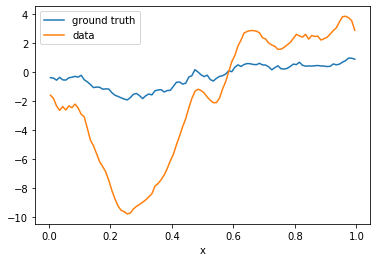

In [3]:
# parameters
n = 100
sigma = 1e-1
L = 1

# define forward operator
K,x = getK(n)

# define covariance matrix
Sigma = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

# generate sample and data
u = np.random.multivariate_normal(np.zeros(n),Sigma)
noise = sigma*np.random.randn(n)
f = K@u + noise

# plot
plt.plot(x,u,label='ground truth')
plt.plot(x,f,label='data')
plt.xlabel('x')
plt.legend()
plt.show()

1. For varying correlation length $L$ and noise level $\sigma$, reconstruct the images using the regularized pseudo inverse of $K$. 

2. Compute the MAP estimate from $\min_{u} \sigma^{-2}\|Ku - f^{\delta}\|_2^2 + \|u\|_{\Sigma^{-1}}^2$. Compare the reconstruction to the one obtained in 1.

3. What happens if you use two different covariance matrices for generating and reconstructing $u$?

````{admonition} Answer 
:class: tip, toggle

To study the difference, we'll consider solving the inverse problem using generalized Tikhonov

$$\min_u \| Ku - f \|^2 + \alpha \| R^{-1/2}u \|_2^2,$$

and compute the average (over random noise instances) error for various $\alpha$. The hypothesis is that using $R = \Sigma$ and $\alpha = \sigma^2$ gives the best results.

We let $n = 100$, $L = 1$, $\sigma = 10^{-1}$ and compute the error for $100$ random instances of the noise.
In figure {numref}`expected_error` we show the expected reconstruction error for various values of $\alpha$ and $L$. We can conclude that

* Using the actual underlying covariance does indeed lead to better results.
* The optimal $\alpha$ when using the true covariance matrix is indeed given by $\sigma^2$
* For large $\alpha$ it does not really matter which covariance matrix is used to reglarize the problem
* For $\alpha = \sigma^2$ the error is slightly sensitive to $L$ with the smallest error being achieved at $L \approx 1$.

```{glue:figure} expected_error
:figwidth: 600px
:name: "expected_error"

Expected error as a function of $\alpha$.
```
````

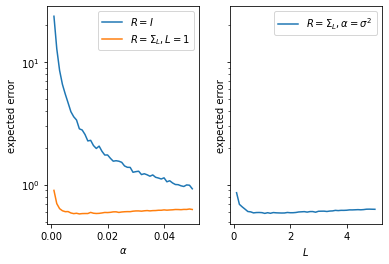

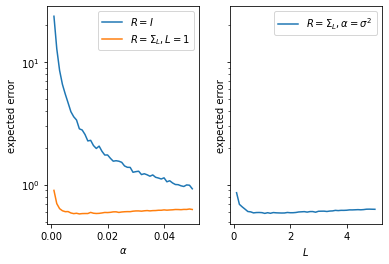

In [21]:
# forward operator
def getK(n):
    h = 1/n;
    d = 1e3;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = np.exp(-d*(xx-yy)**2)
    
    return K,x

# helper function 
def recon(u,sigma,alpha,R,m):
    """
    Draw random noise with variance sigma_true
    and reconstruct using generalized Tikhonov with regularization min_u \|Ku - f\|^2 + alpha \|R^{-1/2}u\|_2^2
    """
    n = len(u)
    K,x = getK(n)
    
    urec = np.zeros((m,n))
    for k in range(m):
        noise = sigma*np.random.randn(n)
        f = K@u + noise
        urec[k] = np.linalg.solve(K.T@K + alpha*np.linalg.inv(R), K.T@f)
    
    error = np.mean(np.sum((urec - u)**2,axis=1))    
    return error,urec

# seed for reproducibility
np.random.seed(42)

# generate true image
n = 100
sigma = 1e-1
L = 1

K,x = getK(n)

Sigma = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

u = np.random.multivariate_normal(np.zeros(n),Sigma)

# sampling settings
m = 100
alphas = np.linspace(1e-3,5e-2,50)

# Reconstruction using R = I
R = np.eye(n)
error1 = np.zeros(len(alphas))
for k in range(len(alphas)):
    error1[k],urec = recon(u,sigma,alphas[k],R,m)
    
# Reconstruction using R = Sigma
R = Sigma
error2 = np.zeros(len(alphas))
for k in range(len(alphas)):
    error2[k],urec = recon(u,sigma,alphas[k],R,m)

# Reconstruction as a function of L
Ls = np.linspace(.1,5,50)
alpha = sigma**2
error3 = np.zeros(len(Ls))
for k in range(len(Ls)):
    R = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/Ls[k])
    error3[k],urec = recon(u,sigma,alpha,R,m)

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].semilogy(alphas,error1,label='$R = I$')
ax[0].semilogy(alphas,error2,label=r'$R = \Sigma_L, L=1$')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('expected error')
ax[0].legend()

ax[1].semilogy(Ls,error3,label=r'$R = \Sigma_L, \alpha=\sigma^2$')
ax[1].set_xlabel(r'$L$')
ax[1].legend()

plt.show()
glue("expected_error",fig,display=False)